### Importación de datos



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda1.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [3]:
tienda1.shape

(2359, 12)

In [4]:
tienda1.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


In [5]:
tienda2.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


In [6]:
tienda3.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


In [7]:
tienda4.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


#1. Análisis de facturación



Calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [8]:
Ingreso_tienda1 = tienda1['Precio'].sum()
Ingreso_tienda2 = tienda2['Precio'].sum()
Ingreso_tienda3 = tienda3['Precio'].sum()
Ingreso_tienda4 = tienda4['Precio'].sum()

Ingreso_tienda1, Ingreso_tienda2, Ingreso_tienda3, Ingreso_tienda4

(np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0))

In [9]:
datos_ingresos = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso": [Ingreso_tienda1, Ingreso_tienda2, Ingreso_tienda3,Ingreso_tienda4]
}

In [10]:
tabla_ingresos = pd.DataFrame(datos_ingresos)
tabla_ingresos = tabla_ingresos.sort_values("Ingreso", ascending=False)
pd.options.display.float_format = '{:,.0f}'.format
tabla_ingresos

,Tienda,Ingreso
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


# 2. Ventas por categoría

Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [11]:
tienda1.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
92,Guitarra acústica,Instrumentos musicales,"434,600","23,500",28/06/2020,Rafael Acosta,Bogotá,5,Tarjeta de crédito,5,5,-74
1107,Set de vasos,Artículos para el hogar,"41,200","2,900",27/12/2020,Izabela de León,Bogotá,5,Tarjeta de crédito,4,5,-74
1303,Vaso térmico,Deportes y diversión,"36,000","2,300",25/03/2021,Mariana Herrera,Leticia,4,Tarjeta de crédito,8,-4,-70
1713,Smart TV,Electrónicos,"1,661,900","89,000",13/02/2022,Maria Alfonso,Bogotá,5,Tarjeta de crédito,2,5,-74
526,Refrigerador,Electrodomésticos,"2,434,000","127,800",03/03/2021,Maria Alfonso,Cúcuta,5,Tarjeta de crédito,5,8,-73
2353,Cubertería,Artículos para el hogar,"40,500",0,30/12/2022,Lucas Olivera,Bogotá,5,Tarjeta de crédito,1,5,-74
629,Balón de baloncesto,Deportes y diversión,"49,900",800,17/01/2020,Izabela de León,Bogotá,5,Cupón,1,5,-74
1555,Modelado predictivo,Libros,"65,500","1,700",26/04/2021,Lucas Olivera,Bogotá,3,Tarjeta de crédito,8,5,-74
186,Mesa de comedor,Muebles,"217,000","9,700",14/09/2021,Pedro Gomez,Pereira,1,Cupón,1,5,-76
1020,TV LED UHD 4K,Electrónicos,"2,975,000","160,800",28/12/2022,Juan Fernandez,Cali,5,Tarjeta de crédito,1,3,-77


### Tienda 1

In [12]:
vt_categoria_tienda1 = tienda1.groupby("Categoría del Producto").size()
vt_categoria_tienda1 = vt_categoria_tienda1.sort_values(ascending=False)
vt_categoria_tienda1 = vt_categoria_tienda1.reset_index(name="Total")

vt_categoria_tienda1

,Categoría del Producto,Total
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


### Tienda 2

In [13]:
vt_categoria_tienda2 = tienda2.groupby("Categoría del Producto").size()
vt_categoria_tienda2 = vt_categoria_tienda2.sort_values(ascending=False)
vt_categoria_tienda2 = vt_categoria_tienda2.reset_index(name="Total")

vt_categoria_tienda2

,Categoría del Producto,Total
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


### Tienda 3

In [14]:
vt_categoria_tienda3 = tienda3.groupby("Categoría del Producto").size()
vt_categoria_tienda3 = vt_categoria_tienda3.sort_values(ascending=False)
vt_categoria_tienda3 = vt_categoria_tienda3.reset_index(name="Total")

vt_categoria_tienda3

,Categoría del Producto,Total
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Artículos para el hogar,177
7,Instrumentos musicales,177


### Tienda 4

In [15]:
vt_categoria_tienda4 = tienda4.groupby("Categoría del Producto").size()
vt_categoria_tienda4 = vt_categoria_tienda4.sort_values(ascending=False)
vt_categoria_tienda4 = vt_categoria_tienda4.reset_index(name="Total")

vt_categoria_tienda4

,Categoría del Producto,Total
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


# 3. Calificación promedio de la tienda


Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [16]:
tienda1.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
1662,Bloques de construcción,Juguetes,"34,400","2,000",08/03/2020,Izabela de León,Bogotá,4,Tarjeta de crédito,2,5,-74
382,Mesa de comedor,Muebles,"228,400","20,000",31/03/2023,Felipe Santos,Bogotá,3,Nequi,1,5,-74
1495,Mesa de noche,Muebles,"294,700","15,900",11/09/2022,Juliana Costa,Bogotá,1,Tarjeta de crédito,2,5,-74
974,Sillón,Muebles,"284,400","13,300",23/10/2022,Blanca Ramirez,Medellín,3,Tarjeta de crédito,3,6,-76
1738,Mesa de comedor,Muebles,"314,300","17,000",24/09/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,3,5,-74
562,Carrito de control remoto,Juguetes,"76,800","4,600",27/11/2020,Felipe Santos,Medellín,5,Tarjeta de crédito,2,6,-76
1480,Auriculares,Electrónicos,"118,500","4,500",11/04/2021,Beatriz Morales,Bogotá,1,Tarjeta de crédito,6,5,-74
1459,Cuerda para saltar,Deportes y diversión,"19,300","7,800",27/02/2020,Pedro Gomez,Pereira,4,Tarjeta de crédito,10,5,-76
1554,Ciencia de datos con Python,Libros,"65,200","3,700",20/03/2021,Blanca Ramirez,Bogotá,5,Cupón,1,5,-74
1664,Smartwatch,Electrónicos,"120,400","4,600",30/11/2021,Pedro Gomez,Bogotá,5,Tarjeta de crédito,1,5,-74


In [17]:
prom_calificacion_tienda1 = tienda1["Calificación"].mean()
prom_calificacion_tienda2 = tienda2["Calificación"].mean()
prom_calificacion_tienda3 = tienda3["Calificación"].mean()
prom_calificacion_tienda4 = tienda4["Calificación"].mean()

prom_calificacion_tienda1, prom_calificacion_tienda2, prom_calificacion_tienda3, prom_calificacion_tienda4

(np.float64(3.976685036032217),
 np.float64(4.037303942348453),
 np.float64(4.048325561678677),
 np.float64(3.9957591178965224))

In [18]:
prom_calificacion = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificacion": [prom_calificacion_tienda1, prom_calificacion_tienda2, prom_calificacion_tienda3,prom_calificacion_tienda4]
}

prom_calificacion

{'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
 'Calificacion': [np.float64(3.976685036032217),
  np.float64(4.037303942348453),
  np.float64(4.048325561678677),
  np.float64(3.9957591178965224)]}

In [19]:
tabla_calificacion = pd.DataFrame(prom_calificacion)
tabla_calificacion = tabla_calificacion.sort_values("Calificacion", ascending=False)
pd.options.display.float_format = '{:.2f}'.format
tabla_calificacion

,Tienda,Calificacion
2,Tienda 3,4.05
1,Tienda 2,4.04
3,Tienda 4,4.00
0,Tienda 1,3.98


# 4. Productos más y menos vendidos

Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [20]:
tienda1.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
1882,Cama box,Muebles,427100.00,20900.00,28/04/2021,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25,-75.56
435,Batería,Instrumentos musicales,956800.00,51200.00,26/05/2020,Santiago Silva,Bogotá,4,Tarjeta de crédito,2,4.61,-74.08
2162,Guitarra acústica,Instrumentos musicales,340500.00,19400.00,04/06/2022,Rafael Acosta,Cali,1,Nequi,1,3.44,-76.52
539,Armario,Muebles,512200.00,25500.00,16/08/2021,Juliana Costa,Bogotá,5,Nequi,1,4.61,-74.08
1598,Celular ABXY,Electrónicos,900400.00,48200.00,01/09/2022,Camila Rivera,Bogotá,5,Cupón,1,4.61,-74.08
1733,Estufa,Electrodomésticos,414400.00,22700.00,27/11/2020,Maria Alfonso,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
1947,Cama king,Muebles,440600.00,21700.00,29/09/2021,Lucas Olivera,Medellín,4,Tarjeta de crédito,7,6.25,-75.56
1710,Batería,Instrumentos musicales,1048700.00,54000.00,31/12/2022,Juliana Costa,Medellín,4,Tarjeta de crédito,1,6.25,-75.56
2223,Mesa de comedor,Muebles,321400.00,15300.00,11/02/2021,Ángel Rodriguez,Cali,5,Tarjeta de crédito,5,3.44,-76.52
147,Armario,Muebles,452000.00,24300.00,12/02/2020,Rafael Acosta,Pereira,4,Tarjeta de crédito,4,4.81,-75.70


In [21]:
top_productos_tienda1 = tienda1.groupby("Producto").size().sort_values(ascending=False)
top_productos_tienda2 = tienda2.groupby("Producto").size().sort_values(ascending=False)
top_productos_tienda3 = tienda3.groupby("Producto").size().sort_values(ascending=False)
top_productos_tienda4 = tienda4.groupby("Producto").size().sort_values(ascending=False)

In [22]:
bottom_productos_tienda1 = tienda1.groupby("Producto").size().sort_values(ascending=True)
bottom_productos_tienda2 = tienda2.groupby("Producto").size().sort_values(ascending=True)
bottom_productos_tienda3 = tienda3.groupby("Producto").size().sort_values(ascending=True)
bottom_productos_tienda4 = tienda4.groupby("Producto").size().sort_values(ascending=True)

In [23]:
top_productos_tienda1.head(5)

,0
Producto,
Armario,60
TV LED UHD 4K,60
Microondas,60
Secadora de ropa,58
Mesa de noche,56


In [24]:
top_productos_tienda2.head(5)

,0
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Pandereta,58
Guitarra acústica,58


In [25]:
top_productos_tienda3.head(5)

,0
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55


In [26]:
top_productos_tienda4.head(5)

,0
Producto,
Cama box,62
Cubertería,59
Cama king,56
Dashboards con Power BI,56
Carrito de control remoto,55


In [27]:
bottom_productos_tienda1.head(5)

,0
Producto,
Auriculares con micrófono,33
Celular ABXY,33
Olla de presión,35
Pandereta,36
Ciencia de datos con Python,39


In [28]:
bottom_productos_tienda2.head(5)

,0
Producto,
Juego de mesa,32
Impresora,34
Mesa de comedor,34
Sillón,35
Auriculares,37


In [29]:
bottom_productos_tienda3.head(5)

,0
Producto,
Bloques de construcción,35
Set de vasos,36
Mochila,36
Microondas,36
Vaso térmico,38


In [30]:
bottom_productos_tienda4.head(5)

,0
Producto,
Guitarra eléctrica,33
Armario,34
Guitarra acústica,37
Ciencia de datos con Python,38
Lavadora de ropa,38


# 5. Envío promedio por tienda

Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [31]:
tienda1.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2224,Pandereta,Instrumentos musicales,78400.00,2400.00,16/10/2020,Juliana Costa,Bogotá,5,Tarjeta de crédito,1,4.61,-74.08
2307,Balón de baloncesto,Deportes y diversión,69800.00,1900.00,10/11/2021,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.61,-74.08
661,Mesa de comedor,Muebles,214800.00,12500.00,09/03/2021,Blanca Ramirez,Cúcuta,5,Tarjeta de crédito,1,7.89,-72.51
50,Tablet ABXY,Electrónicos,1130300.00,58400.00,08/03/2023,Mariana Herrera,Cali,5,Tarjeta de crédito,1,3.44,-76.52
2320,Mesa de centro,Muebles,125100.00,6900.00,26/09/2022,Camila Rivera,Medellín,5,Tarjeta de crédito,5,6.25,-75.56
744,Asistente virtual,Electrónicos,153400.00,8400.00,21/03/2021,Izabela de León,Barranquilla,1,Cupón,1,10.97,-74.78
1828,Cama king,Muebles,599300.00,32100.00,23/01/2021,Maria Alfonso,Pereira,5,Nequi,1,4.81,-75.70
1847,Set de ollas,Artículos para el hogar,222700.00,10000.00,14/05/2021,Beatriz Morales,Medellín,1,Tarjeta de crédito,10,6.25,-75.56
375,Iniciando en programación,Libros,33500.00,2000.00,16/10/2020,Juan Fernandez,Bogotá,5,Nequi,1,4.61,-74.08
982,Armario,Muebles,484100.00,26200.00,11/02/2020,Felipe Santos,Bogotá,4,Tarjeta de crédito,1,4.61,-74.08


In [32]:
prom_Cenvio_tienda1 = tienda1["Costo de envío"].mean()
prom_Cenvio_tienda2 = tienda2["Costo de envío"].mean()
prom_Cenvio_tienda3 = tienda3["Costo de envío"].mean()
prom_Cenvio_tienda4 = tienda4["Costo de envío"].mean()

prom_Cenvio_tienda1, prom_Cenvio_tienda2, prom_Cenvio_tienda3, prom_Cenvio_tienda4

(np.float64(26018.60958033065),
 np.float64(25216.235693090293),
 np.float64(24805.680373039424),
 np.float64(23459.457167090754))

In [33]:
prom_Cenvio = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Cenvio": [prom_Cenvio_tienda1, prom_Cenvio_tienda2, prom_Cenvio_tienda3,prom_Cenvio_tienda4]
}

prom_Cenvio

{'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
 'Cenvio': [np.float64(26018.60958033065),
  np.float64(25216.235693090293),
  np.float64(24805.680373039424),
  np.float64(23459.457167090754)]}

In [34]:
tabla_Cenvio = pd.DataFrame(prom_Cenvio)
tabla_Cenvio = tabla_Cenvio.sort_values("Cenvio", ascending=False)
pd.options.display.float_format = '{:.2f}'.format
tabla_Cenvio

,Tienda,Cenvio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


# Generando gráfico

Genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

In [35]:
import matplotlib.pyplot as plt

## Grafico de barras Ingreso total por tienda

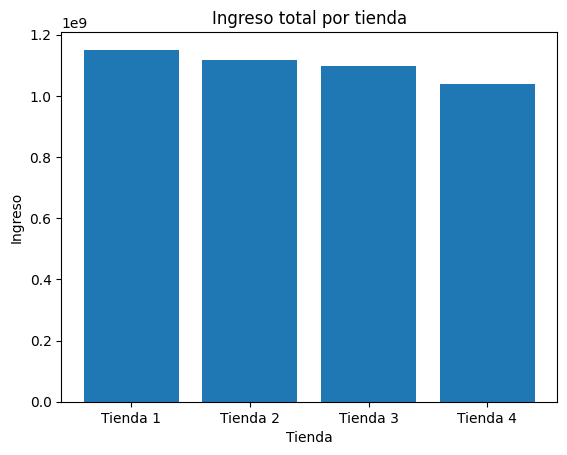

In [36]:
plt.figure()
plt.bar(tabla_ingresos["Tienda"], tabla_ingresos["Ingreso"])
plt.title("Ingreso total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso")
plt.show()

## Grafico de barras Ventas por categoría

### Tienda 1

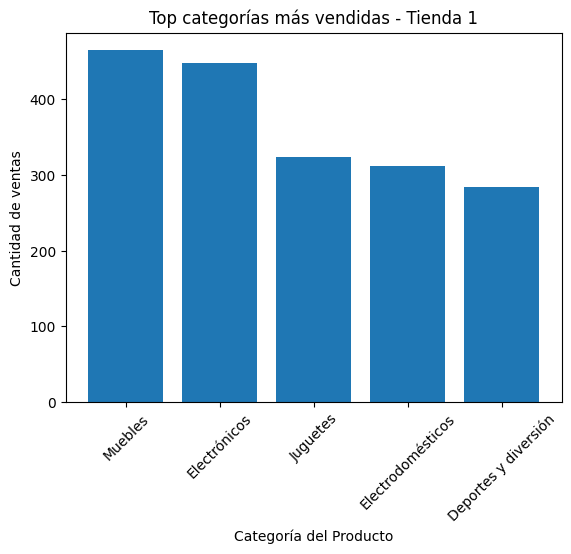

In [37]:
top_categorias1 = vt_categoria_tienda1.head(5)

plt.figure()
plt.bar(top_categorias1["Categoría del Producto"], top_categorias1["Total"])
plt.title("Top categorías más vendidas - Tienda 1")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()


### Tienda 2

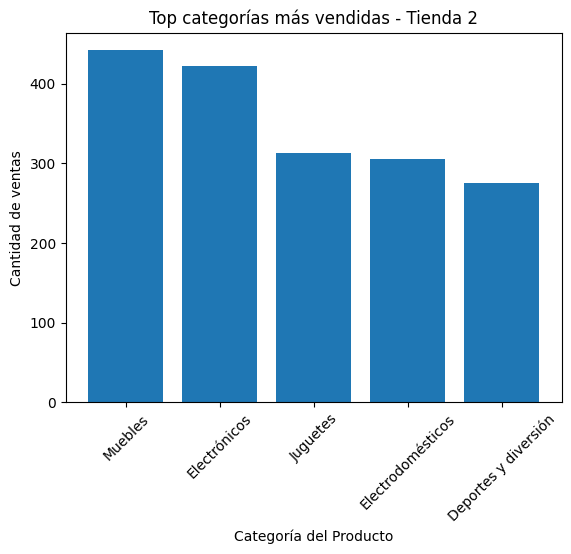

In [38]:
top_categorias2 = vt_categoria_tienda2.head(5)

plt.figure()
plt.bar(top_categorias2["Categoría del Producto"], top_categorias2["Total"])
plt.title("Top categorías más vendidas - Tienda 2")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()

### Tienda 3

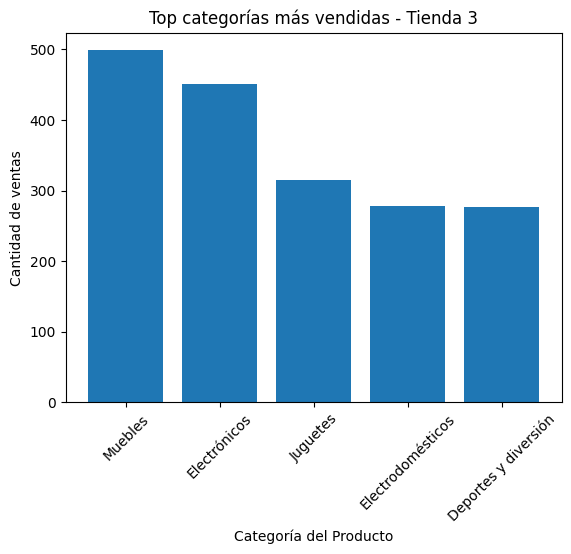

In [39]:
top_categorias3 = vt_categoria_tienda3.head(5)

plt.figure()
plt.bar(top_categorias3["Categoría del Producto"], top_categorias3["Total"])
plt.title("Top categorías más vendidas - Tienda 3")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()

### Tienda 4

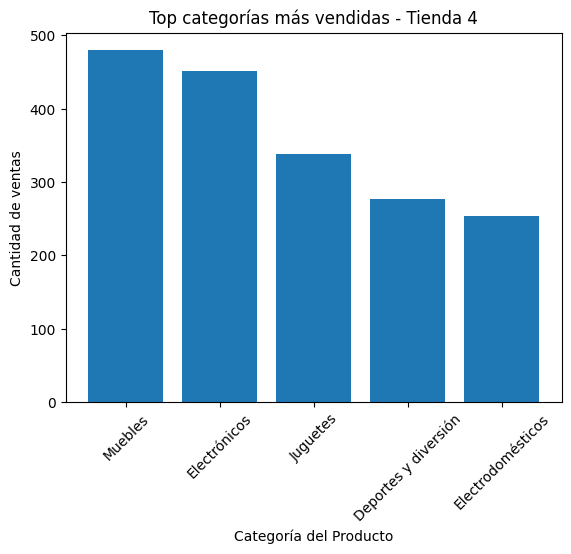

In [40]:
top_categorias4 = vt_categoria_tienda4.head(5)

plt.figure()
plt.bar(top_categorias4["Categoría del Producto"], top_categorias4["Total"])
plt.title("Top categorías más vendidas - Tienda 4")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()

## Grafico de lineas Calificación promedio por tienda

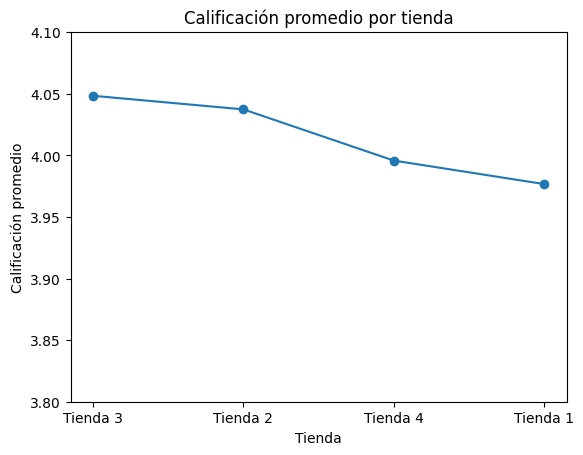

In [41]:
plt.figure()
plt.plot(tabla_calificacion["Tienda"], tabla_calificacion["Calificacion"], marker='o')
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(3.8, 4.1)
plt.show()


# Informe Final de Análisis de Tiendas

## Introducción

El presente informe tiene como objetivo apoyar la toma de decisión del Sr. Juan respecto a cuál de sus cuatro tiendas debería vender, con el fin de liberar capital e invertir en un nuevo negocio. Para ello, se realizó un análisis comparativo considerando múltiples factores clave: los ingresos totales de cada tienda, el comportamiento de ventas por categoría de producto, las calificaciones promedio otorgadas por los clientes, los productos más y menos vendidos y el costo promedio de envío.

El análisis se apoya en datos históricos de ventas y en visualizaciones que permiten identificar fortalezas, debilidades y oportunidades en cada tienda, con el propósito de emitir una recomendación clara, objetiva y fundamentada.

## Desarrollo del análisis

### Ingresos totales por tienda

Al analizar los ingresos totales, se observa que la Tienda 1 presenta el mayor ingreso acumulado, seguida muy de cerca por la Tienda 2 y la Tienda 3. La Tienda 4 registra el menor ingreso total entre las cuatro.

Si bien la Tienda 1 lidera en ingresos, las diferencias entre las tres primeras no son excesivamente amplias, lo que indica que el desempeño financiero general es relativamente homogéneo, con una ligera desventaja para la Tienda 4.

### Ventas por categoría de producto

En las cuatro tiendas, la categoría de Muebles es consistentemente la más vendida, seguida por Electrónicos y Juguetes, lo que evidencia una demanda estable en estas líneas de producto.

No obstante, la Tienda 3 y la Tienda 4 destacan por tener un mayor volumen de ventas en categorías clave como Muebles y Electrónicos, lo que sugiere una mejor alineación con las preferencias del mercado. En contraste, la Tienda 1 muestra menores volúmenes relativos en algunas categorías secundarias, como Libros e Instrumentos musicales.

### Calificación promedio de los clientes

Desde la perspectiva de satisfacción del cliente, la Tienda 3 obtiene la mejor calificación promedio, seguida muy de cerca por la Tienda 2. La Tienda 4 se mantiene en un nivel aceptable, mientras que la Tienda 1 presenta la calificación promedio más baja, aunque la diferencia no es crítica.

Este indicador es relevante, ya que una mejor percepción del cliente suele traducirse en mayor fidelidad, repetición de compra y sostenibilidad a largo plazo.

### Productos más y menos vendidos

El análisis de los productos más y menos vendidos muestra que las cuatro tiendas cuentan con un portafolio similar y alineado con la demanda del mercado. Sin embargo, la Tienda 3 y la Tienda 4 presentan una rotación de productos más equilibrada, lo que facilita la gestión de inventarios y reduce riesgos operativos.

En contraste, la Tienda 1 presenta una mayor diferencia entre productos de alta y baja venta, lo que puede generar ineficiencias en el manejo de inventarios y mayores costos asociados a productos de baja rotación.

### Costo de envío promedio

El costo de envío es un factor clave en la eficiencia operativa. En este aspecto, la Tienda 4 presenta el costo de envío promedio más bajo, seguida por la Tienda 3. La Tienda 1 registra el costo de envío más alto, lo que puede afectar tanto la rentabilidad como la percepción del cliente.

## Conclusión y recomendación

A partir del análisis de los ingresos totales, el comportamiento de las ventas por categoría, la calificación promedio de los clientes, el desempeño de los productos y los costos de envío, se concluye que la Tienda 1 es la alternativa más conveniente para ser vendida.

Si bien esta tienda genera el mayor ingreso total, también presenta menores niveles de satisfacción del cliente, el costo de envío promedio más alto y una rotación de productos menos equilibrada en comparación con las demás tiendas. Estos factores pueden afectar su competitividad y requerir mayores esfuerzos de optimización en el mediano plazo.

Por el contrario, la Tienda 3 destaca por su alta calificación promedio y una gestión más estable de su portafolio de productos, mientras que la Tienda 2 mantiene un desempeño financiero sólido y consistente. La Tienda 4, aunque registra menores ingresos, compensa con una operación logística más eficiente y costos de envío más bajos.

En este contexto, se recomienda al Sr. Juan vender la Tienda 1, ya que esta decisión permitiría obtener liquidez inmediata sin comprometer las tiendas con mejores indicadores de eficiencia operativa y satisfacción del cliente, facilitando así la inversión en un nuevo negocio con una base financiera más sólida.